# Photometric limits to the Bulge population sampled by Roman and Rubin

Rubin and Roman will both be able to detect fainter stars than previous surveys, and have complementary limiting magnitudes in the optical and NIR respectively.  This notebook explores the populations both surveys will detect in the Roman Bulge Time Domain survey field. 

In [1]:
from os import path 
import numpy as np 
from matplotlib import pyplot as plt
from astropy.table import Table, Column

## Dataset

We use the [Trilegal galactic model](http://stev.oapd.inaf.it/cgi-bin/trilegal_1.6) since it offers output in both Rubin and Roman filtersets.  
The online UI was used to generate the expected stellar population for OGLE field 512 in the Galactic Bulge as a proxy for the RGES field, with the following parameters.  

l, b = 2:12:56=2.215556, -03:08:08=-3.135555

Total field area=0.0001 sq deg

Limiting mag=27mag

No extinction

In [2]:
def load_trilegal_data(file_path, filterset, header): 
    """
    Function to load the standard ASCII data files produced by the Trilegal online portal. 

    These files have different formats depending on the filterset selected, but all options return the data as an Astropy Table.

    Parameters:
        file_path  str   Path to the input datafile
        filterset  str   Either {rubin, roman}
        header     list  Headers of the columns in the file

    Returns:
        phot_data  table   Table of the Trilegal photometric output
    """
    
    if not path.isfile(file_path):
        raise IOError('Cannot find input file ' + file_path)

    data = np.loadtxt(file_path)

    col_list = [] 
    for i in range(0, len(header), 1):
        col_list.append(Column(name=header[i], data=data[:,i]))

    return Table(col_list)

In [3]:
DATA_DIR = '/Users/rstreet/software/rgps/filtersets'
trilegal_data = {
    'rubin': {
        'file': path.join(DATA_DIR, 'rges_field_lsst_filters.dat'), 
        'header': ['Gc', 'logAge', '[M/H]', 'm_ini', 'logL', 'logTe', 'logg', 'm-M0', 'Av', 'm2/m1', 'mbol', 'u', 'g', 'r', 'i', 'z', 'y', 'Mact']
    },
    'roman': {
        'file': path.join(DATA_DIR, 'rges_field_roman_filters.dat'),
        'header': ['Gc', 'logAge', '[M/H]', 'm_ini', 'logL', 'logTe', 'logg', 'm-M0', 'Av', 'm2/m1', 'mbol', 'F062', 'F087', 'F106', 'F129', 'F158', 'F184', 'F146', 'F213', 'SNprism', 'Grism_1stOrder', 'Grism_0thOrder', 'Mact']
    }
}

In [4]:
photometry = {}
for fset, params in trilegal_data.items():
    phot = load_trilegal_data(params['file'], fset, params['header'])
    photometry[fset] = phot

photometry

{'rubin': <Table length=171196>
    Gc    logAge  [M/H]   m_ini    logL  ...    i       z       y      Mact 
 float64 float64 float64 float64 float64 ... float64 float64 float64 float64
 ------- ------- ------- ------- ------- ... ------- ------- ------- -------
     1.0    6.81    0.43 1.41807   0.549 ...  17.139  17.195  17.218   1.418
     1.0    6.87   -0.05 0.18901   -2.11 ...  23.634  23.146  22.905   0.189
     1.0    6.95   -0.01 0.02519  -2.763 ...  25.825  24.588   23.91   0.025
     1.0    7.01    0.27 0.33188  -1.836 ...  23.275  22.847  22.628   0.332
     1.0    7.03    0.15 0.10106  -1.954 ...  24.081  23.359  22.999   0.101
     1.0    7.15   -0.13 0.15465  -1.772 ...   22.68  22.129  21.857   0.155
     1.0    7.27    0.11 0.08253   -2.14 ...  21.568  20.826  20.455   0.083
     1.0    7.27    0.17  0.1626  -1.896 ...  24.158   23.55  23.251   0.163
     1.0    7.31    0.05 1.58168   0.793 ...  15.998  16.088  16.124   1.582
     ...     ...     ...     ...     ... ...

# Detectable population historgrams

The Trilegal model provides a sample of the stellar population that will be observed by both surveys, but their respective limiting magnitudes in each bandpass dictates the overall shape of the histograms in each filter.  So we start by defining their limiting magnitudes.  

The Roman data were obtained from the [GSFC website](https://roman.gsfc.nasa.gov/science/WFI_technical.html). 

In [5]:
# Rubin limiting magnitudes
rubin_limits = {'u': 23.9, 'g': 25.0, 'r': 24.7, 'i': 24.0, 'z': 23.3, 'y': 22.1}

# Roman limiting magnitudes in a 57s integration
roman_limits = {'F062': 24.77, 'F087': 24.46, 'F106': 24.46, 'F129': 24.43, 'F158': 24.36, 'F184': 23.72, 'F213': 23.14, 'F146': 25.37}

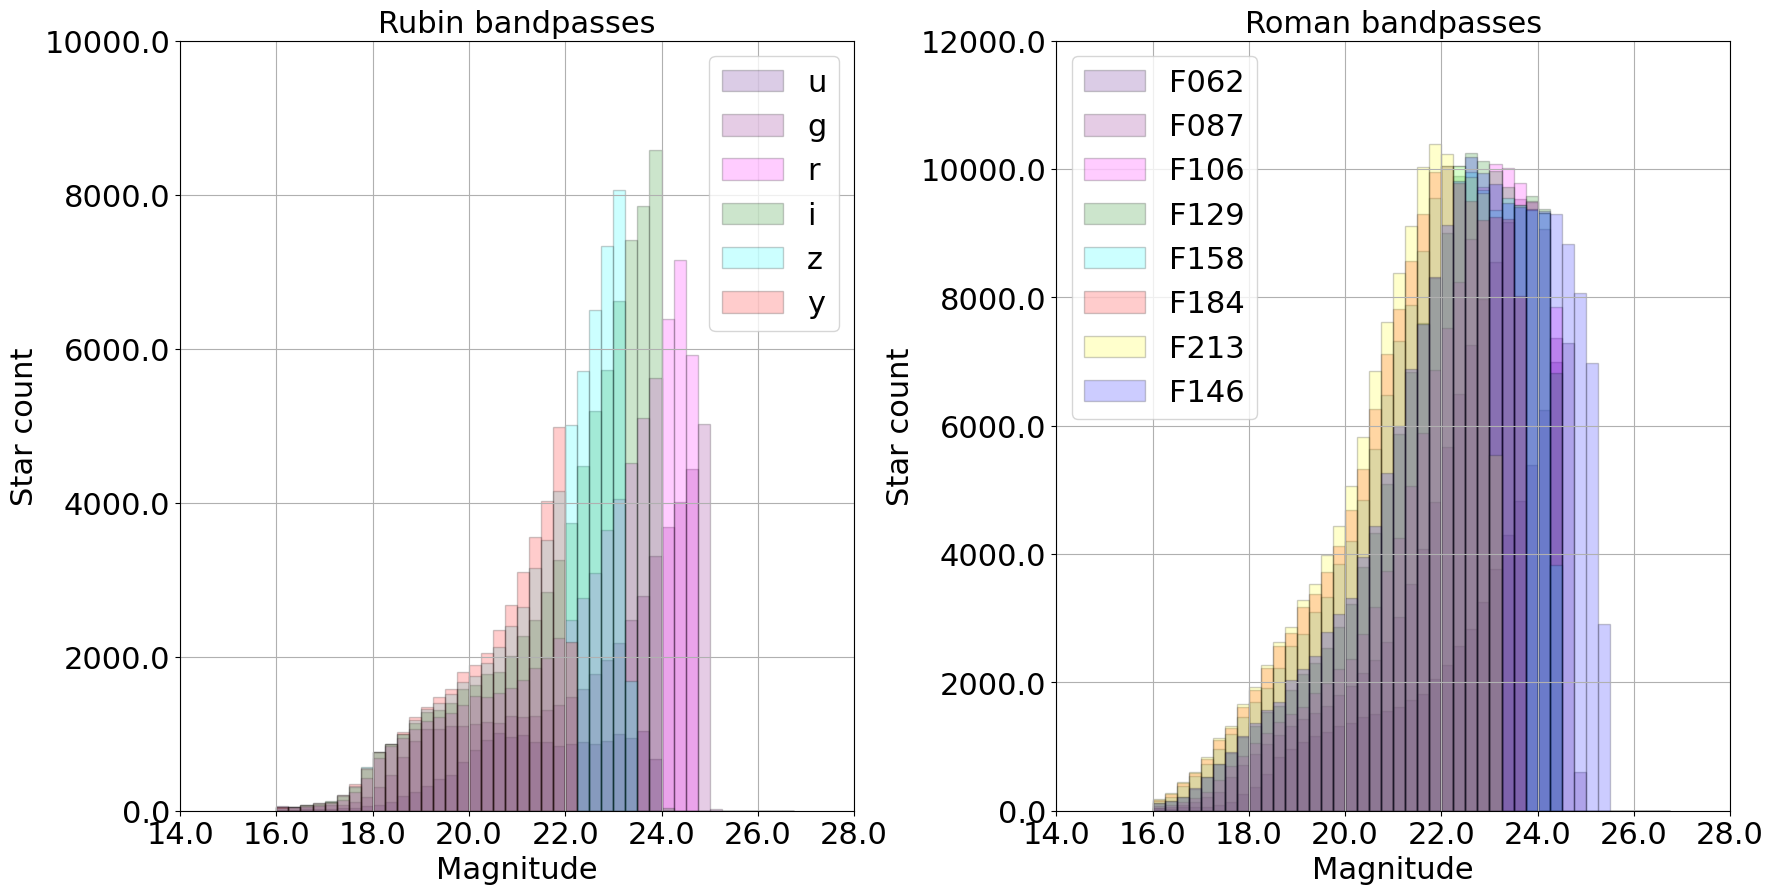

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.3)

font_size = 22

plot_colours = {
    'u': 'indigo', 'g': 'purple', 'r': 'magenta', 'i': 'green', 'z': 'cyan', 'y': 'red', 
    'F062': 'indigo', 'F087': 'purple', 'F106': 'magenta', 'F129': 'green', 'F158': 'cyan', 'F184': 'red', 'F213': 'yellow', 'F146': 'blue'
}

bins = np.arange(16.0, 27.0, 0.25)

# Rubin population
for f in rubin_limits:
    idx = np.where(photometry['rubin'][f] <= rubin_limits[f])
    
    axs[0].hist(photometry['rubin'][f][idx], bins=bins, label=f, color=plot_colours[f], alpha=0.2, edgecolor='black')
axs[0].set_xlabel('Magnitude', fontsize=font_size)
axs[0].set_ylabel('Star count', fontsize=font_size)
axs[0].set_title('Rubin bandpasses', fontsize=font_size)
xticks = axs[0].get_xticks()
xlabels = [str(round(x,0)) for x in xticks]
yticks = axs[0].get_yticks()
ylabels = [str(round(y,0)) for y in yticks]
axs[0].set_xticks(xticks, xlabels, fontsize=font_size)
axs[0].set_yticks(yticks, ylabels, fontsize=font_size)
axs[0].legend(fontsize=font_size)
axs[0].grid()

# Roman population
for f in roman_limits:
    idx = np.where(photometry['roman'][f] <= roman_limits[f]) 

    axs[1].hist(photometry['roman'][f][idx], bins=bins, label=f, color=plot_colours[f], alpha=0.2, edgecolor='black')
axs[1].set_xlabel('Magnitude', fontsize=font_size)
axs[1].set_ylabel('Star count', fontsize=font_size)
axs[1].set_title('Roman bandpasses', fontsize=font_size)
xticks = axs[1].get_xticks()
xlabels = [str(round(x,0)) for x in xticks]
yticks = axs[1].get_yticks()
ylabels = [str(round(y,0)) for y in yticks]
axs[1].set_xticks(xticks, xlabels, fontsize=font_size)
axs[1].set_yticks(yticks, ylabels, fontsize=font_size)
axs[1].legend(fontsize=font_size)
axs[1].grid()

plt.savefig('/Users/rstreet/Roman/Graphics/roman_rubin_detection_limits.png', bbox_inches='tight')